# Bike Sharing Assignment

###### Problem Statement:
A bike sharing company,BoomBikes, want to understand the underlying factors affecing the daily demand in American market.

Requirements are:
- To identify which variables are significant in predicting the demand for shared bikes.
- To identify how well those variables describe the bike demands

Approach:

As the requirement asks to find variables that influence demand, which is a continuous variable, the approach is to create a linear regression model. The model will be able show significant predictor variables for demand column.


### Task1: Reading and Understanding data

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score
from sklearn.metrics  import mean_squared_error
%matplotlib inline


In [3]:
# Read daily bike demand data
bike_data = pd.read_csv('/Users/padmac/Documents/UPGRAD/ML1/Linear_regression/LR assignment/day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Check shape of dataframe
bike_data.shape

(730, 16)

In [5]:
# check columnwise information
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


None of the columns contain any null values.

In [6]:
pd.set_option('display.max_columns',500)
#Check summary statistics
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Few variables in the dataset has to be dropped as they don't give any additional information
- instant   : Index variable
- casual, registered: The dependent variable 'cnt' = casual+registered. As the infomation is already covered in                 cnt, casual and registered will be highly correlated to cnt and can cause data leakage.
              

In [7]:
# Drop columns that are not required
bike_data.drop(labels=['instant','casual','registered'],axis=1,inplace=True)

In [8]:
bike_data.shape

(730, 13)

###### Understand the categorical column

In [9]:
#Checking categories for categorical columns
catcols=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']
for cols in catcols:
    print(bike_data[cols].value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64
1    365
0    365
Name: yr, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64
1    504
0    226
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64


In [10]:
# Changing the data type of object columns that are in numeric format and giving meaningfull lables for easy analysis

bike_data['season']    = bike_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_data['mnth']      = bike_data['mnth'].map({1: 'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',
                                            8:'August',9:'September',10:'October',11:'November',12:'December'})

bike_data['weekday']   = bike_data['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',
                                                5:'Friday',6:'Saturday'})
bike_data['weathersit']= bike_data['weathersit'].map({1:'clear',2:'misty ',3:'light rain/snow',4:'heavy snow/rain'})


In [11]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,January,0,Monday,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,January,0,Tuesday,1,misty,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,January,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,January,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,January,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
#check column wise info
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
dteday        730 non-null object
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 74.2+ KB


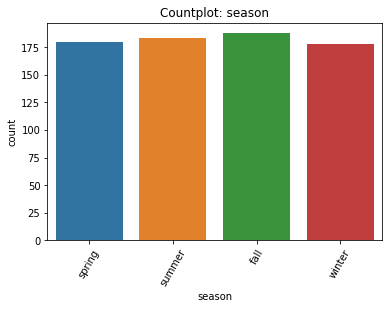

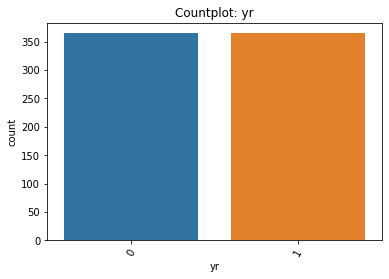

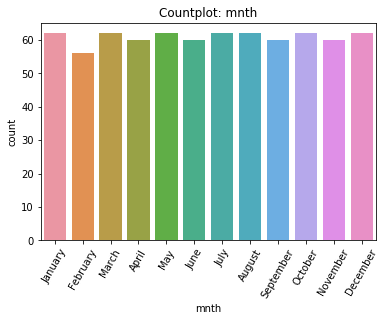

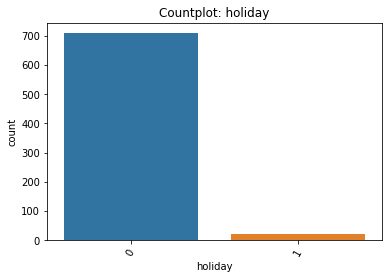

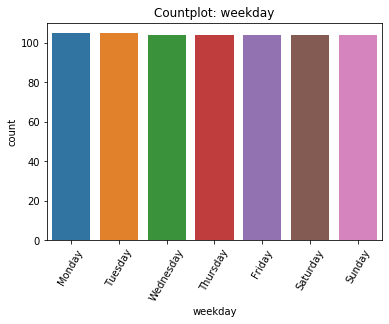

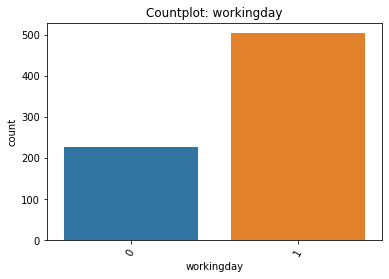

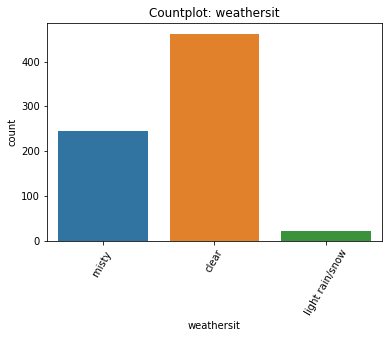

In [13]:
# Countplot for categorical features to understand the distribution
for cols in catcols:
    sns.countplot(x=cols,data=bike_data)
    plt.title(f'Countplot: {cols}')
    plt.xticks(rotation=60)
    plt.show()

Columns season, month,weekday,year has almost equal distribution among categories. Holiday,workingday and weathersit have unequal distribution among categories

###### Understand the continuous columns

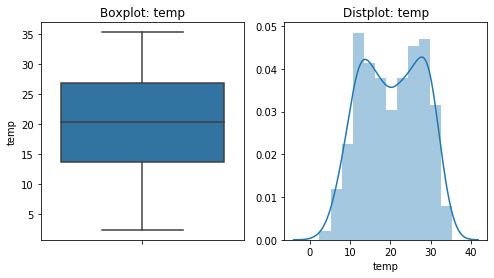

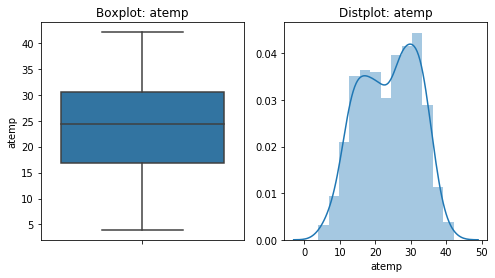

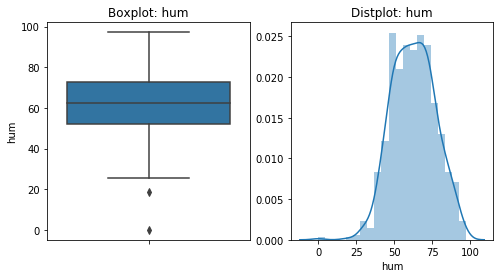

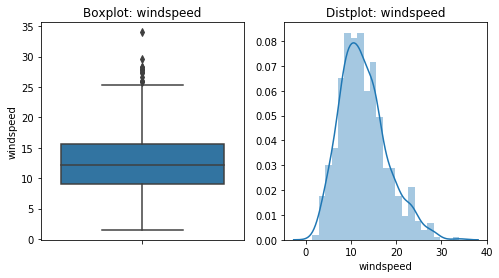

In [14]:
#plotting boxplot and distplot for numeric variables
contcols=['temp', 'atemp', 'hum', 'windspeed']
for cols in contcols:
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.title(f'Boxplot: {cols}')
    sns.boxplot(y=cols,data=bike_data)
    plt.subplot(1,2,2)
    plt.title(f'Distplot: {cols}')
    sns.distplot(bike_data[cols])
    plt.show()

In [15]:
#check quantiles for hum and windspeed
bike_data[['hum','windspeed']].quantile([0.5,0.75,0.8,0.9,0.99,1])

,hum,windspeed
0.50,62.625000,12.125325
0.75,72.989575,15.625589
0.80,75.291700,16.639785
0.90,81.762500,19.833997
0.99,92.795857,27.380948
1.00,97.250000,34.000021


Looks like we can ignore these extreme values as they tend to be normal.

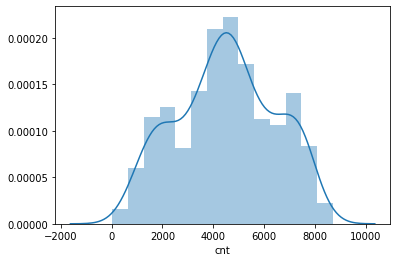

In [16]:
#Check the distribution of target variable(cnt)
sns.distplot(bike_data['cnt'])
plt.show()

#### Bivariate analysis

In [17]:
#covert dteday to datetime 
bike_data.dteday=pd.to_datetime(bike_data.dteday,format='%d-%m-%Y')
bike_data.dteday.head()

0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
Name: dteday, dtype: datetime64[ns]

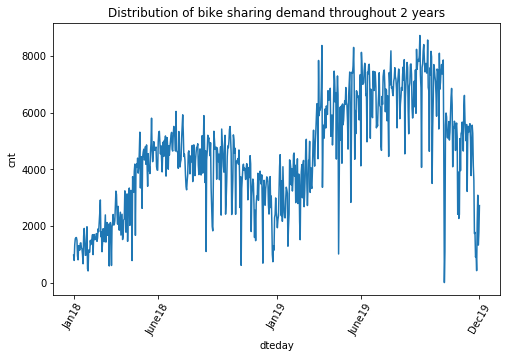

In [18]:
# Check the variation in demand throughout 2 years
plt.figure(figsize=(8,5))
plt.title('Distribution of bike sharing demand throughout 2 years')
sns.lineplot(x='dteday',y='cnt',data=bike_data)
plt.xticks(ticks=['2018-01-01','2018-06-01','2019-01-01','2019-06-01','2019-12-31'],
           labels=['Jan18','June18','Jan19','June19','Dec19'],rotation=60)
plt.show()

Overall the count is varying across the years. Undoubtedly the demand for the bike sharing was high in 2019 compared to 2018. For each year, the demad peaks during mid year and hits low during the start and end of the year.

In [19]:
#As the day,year,month parts of the date variable is already present in the data set, dropping variable dteday here.
bike_data.drop(labels=['dteday'],axis=1,inplace=True)
print(bike_data.shape)
bike_data.head()

(730, 12)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


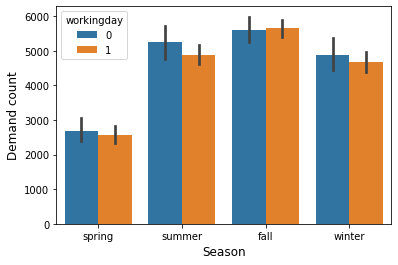

In [20]:
# Relation between demand count and season with respect to working day
sns.barplot(x='season',y='cnt',data=bike_data,hue='workingday')
plt.xlabel('Season',fontsize=12)
plt.ylabel('Demand count',fontsize=12)
plt.show()

Highest mean demand comes for fall season. When fall-working days has a slightly raised deamand compared to non-working days,rest all other sesons show higher demand for non-working days. Spring has shown the least demand.

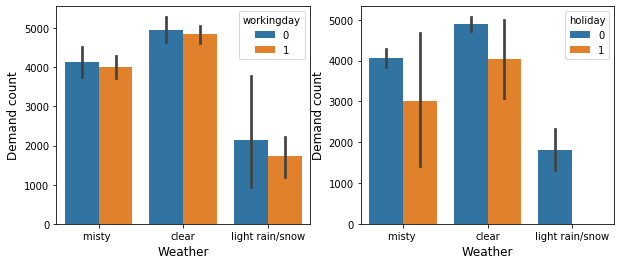

In [21]:
# Relation between demand count and weathersit with respect to working day and holiday
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x='weathersit',y='cnt',data=bike_data,hue='workingday')
plt.xlabel('Weather',fontsize=12)
plt.ylabel('Demand count',fontsize=12)
plt.subplot(1,2,2)
sns.barplot(x='weathersit',y='cnt',data=bike_data,hue='holiday')
plt.xlabel('Weather',fontsize=12)
plt.ylabel('Demand count',fontsize=12)

plt.show()

Undoubtedly bike sharing demand is greater for clear days and there is no demand during harsh weather conditions like heavy rain or snow. Even though the data shows very less differnce in demand for working/no-working days,except for light rain/snow days, under all weather conditions, in case of holidays, there exists a considerable difference in the demand. The demand is high in non-holidays no matter what the weather conditions are.

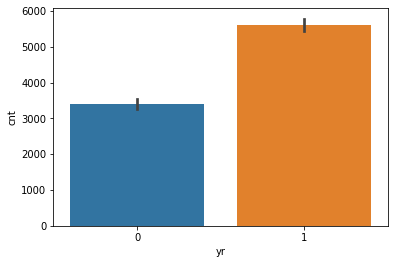

In [22]:
#Plot year vs count
sns.barplot(x='yr',y='cnt',data=bike_data)
plt.show()

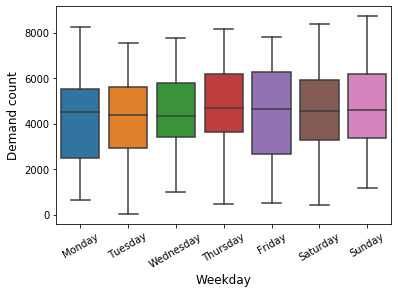

In [23]:
# Relation between demand count and weekday
sns.boxplot(x='weekday',y='cnt',data=bike_data)
plt.xlabel('Weekday',fontsize=12)
plt.ylabel('Demand count',fontsize=12)
plt.xticks(rotation=30)
plt.show()

Median demand is almost same for all week days. Largest variation can be seen in case of Friday.


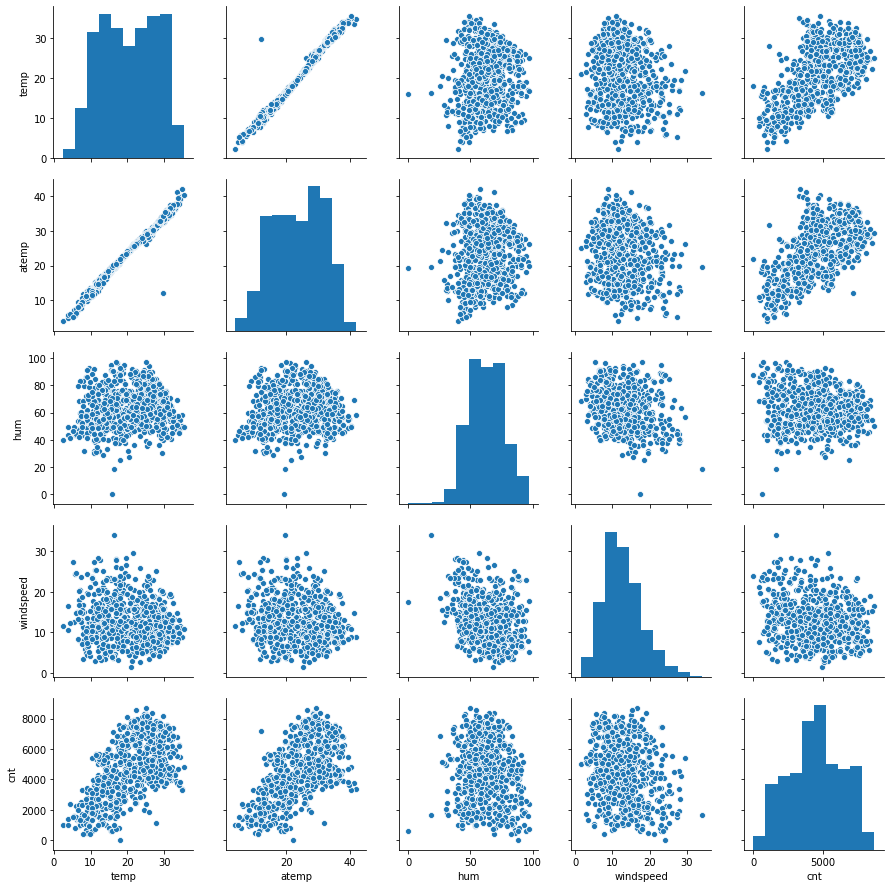

In [24]:
# Pairplot between continuous variables
sns.pairplot(bike_data[contcols+['cnt']])
plt.show()

Observations:
- Temp and atemp looks highly correlated
- Cnt and temp seems to have a linear relationship
-

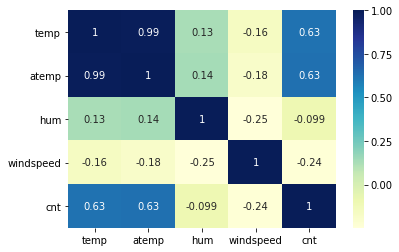

In [25]:
#Check correlation coefficients for continuous variables
sns.heatmap(bike_data[contcols+['cnt']].corr(),annot=True,cmap="YlGnBu")
plt.show()

Observations:
- Looks like demand increases with increasing temperature.
- Slight negative relationship between windspeed and cnt. High windspeed can result in less demand bike. 

###### Multivariate analysis

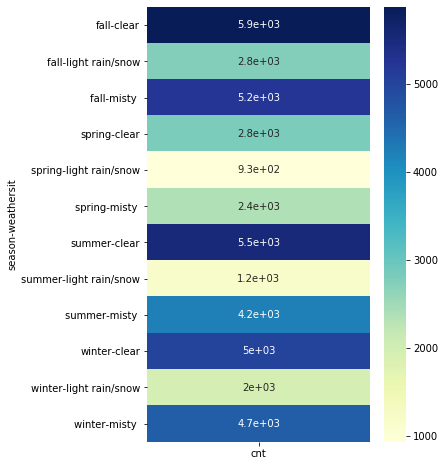

In [26]:
#Relation between season-weathersit and count variable
# Create a pivot table with mean aggregate values of cnt column
seas_count_table=pd.pivot_table(data=bike_data,index=['season','weathersit'],
                               values='cnt',aggfunc='mean')

# Plot the table values using a heat map
plt.figure(figsize=(5,8))
sns.heatmap(seas_count_table,annot=True,cmap="YlGnBu",annot_kws={'fontsize':10})
plt.show()

Observations:
- Highest mean count reported for fall-clear days followed by summer-clear days.
- fall-misty,winter-clear,winter-misty days also shows good number of demand.

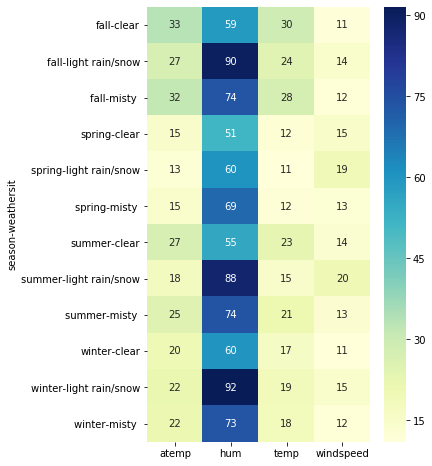

In [27]:
#Relation between season-weathersit and continuous predictor variables
# Create a pivot table with mean aggregate values and continuous predictor variables
seas_cont_table=pd.pivot_table(data=bike_data,index=['season','weathersit'],values=contcols,aggfunc='mean')

# Plot the table values using a heat map
plt.figure(figsize=(5,8))
sns.heatmap(seas_cont_table,annot=True,cmap="YlGnBu",annot_kws={'fontsize':10})
plt.show()

Observations
- Temperature high for fall days and low for spring days
- Windspeed low for fall/winter-clear days and high for spring/summer- light rain/snow days.
- Humidity high on days with slight rain/snow


### Task2: Data Preparation

###### Create dummy variables

As per the EDA, season-fall, weathersit-clear has a relation with the demand('cnt') variable. But we are not yet sure which category of categorical variable actually influence 'cnt' variable until modelling. So here drop_first=True is not used when creating dummy variables so that we get the important variables later. 
In case of mulicollinearity, resulted by the redundant variables, it will be dealt by dropping colinear variables after checking VIF of model through multiple iterations.


In [28]:
# Create dummy variables for categorical predictor columns 
bike_data=pd.get_dummies(bike_data,columns=['season','mnth', 'weekday','weathersit'])
print(bike_data.shape)
bike_data.head()

(730, 34)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter,mnth_April,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_clear,weathersit_light rain/snow,weathersit_misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


###### Split the data into train and test

In [29]:
# Drop the target variable from the bike_data and store to a new variable y
y=bike_data.pop('cnt')
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [30]:
bike_data.shape

(730, 33)

In [31]:
# Split data into 7:3 ratio 
X_train, X_test, y_train, y_test=train_test_split(bike_data,y,train_size=0.7,test_size=0.3,random_state=100)

In [32]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_fall,season_spring,season_summer,season_winter,mnth_April,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_clear,weathersit_light rain/snow,weathersit_misty
653,1,0,1,19.201653,23.0423,55.8333,12.208807,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


###### Rescaling features

In [33]:
# Apply MinMaxScaler to all continuous predictor variables
scaler = MinMaxScaler()
X_train[contcols]=scaler.fit_transform(X_train[contcols])


In [34]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_fall,season_spring,season_summer,season_winter,mnth_April,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_clear,weathersit_light rain/snow,weathersit_misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [35]:
X_train.shape

(510, 33)

### Task3 : Build and evaluate Model

#### Build first model

In [36]:
# Build linear regression model using sklearn library
sk_lm = LinearRegression()
sk_lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
# Run Recursive Feature Elimination(RFE) to reduce the number of variables to 15
rfe = RFE(sk_lm,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [38]:
list(zip(X_train.columns,rfe.ranking_,rfe.support_))

[('yr', 1, True),
 ('holiday', 19, False),
 ('workingday', 18, False),
 ('temp', 1, True),
 ('atemp', 1, True),
 ('hum', 1, True),
 ('windspeed', 1, True),
 ('season_fall', 4, False),
 ('season_spring', 1, True),
 ('season_summer', 9, False),
 ('season_winter', 1, True),
 ('mnth_April', 13, False),
 ('mnth_August', 8, False),
 ('mnth_December', 1, True),
 ('mnth_February', 1, True),
 ('mnth_January', 1, True),
 ('mnth_July', 1, True),
 ('mnth_June', 10, False),
 ('mnth_March', 11, False),
 ('mnth_May', 3, False),
 ('mnth_November', 1, True),
 ('mnth_October', 12, False),
 ('mnth_September', 1, True),
 ('weekday_Friday', 17, False),
 ('weekday_Monday', 6, False),
 ('weekday_Saturday', 16, False),
 ('weekday_Sunday', 14, False),
 ('weekday_Thursday', 15, False),
 ('weekday_Tuesday', 5, False),
 ('weekday_Wednesday', 7, False),
 ('weathersit_clear', 1, True),
 ('weathersit_light rain/snow', 1, True),
 ('weathersit_misty ', 2, False)]

In [39]:
# Columns short listed by RFE 
rfe_o_cols=X_train.columns[rfe.support_]
rfe_o_cols

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_December', 'mnth_February', 'mnth_January',
       'mnth_July', 'mnth_November', 'mnth_September', 'weathersit_clear',
       'weathersit_light rain/snow'],
      dtype='object')

In [40]:
# Columns dicarded by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_fall', 'season_summer', 'mnth_April',
       'mnth_August', 'mnth_June', 'mnth_March', 'mnth_May', 'mnth_October',
       'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_misty '],
      dtype='object')

In [41]:
# Drop columns that are RFE has not given a support
X_train_rfe = X_train[rfe_o_cols]

#### Build model using stats model, for  detailed statistics


In [42]:
# Add constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [43]:
# Fit model
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary()) # get summary

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.2
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          3.67e-186
Time:                        20:18:56   Log-Likelihood:                -4118.3
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     494   BIC:                             8336.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

The model has a R-squared value of 0.841 and Adj. R-squared of 0.836. For atemp the p-value is high and 
from previous correlation heatmap it was identified that temp and atemp are highly correlated. So dropping
atemp and rebuilding the model.

In [44]:
# Creating new train data after dropping hum
X_train_new = X_train_rfe.drop(labels=['atemp'],axis=1)
X_train_new.head()

,const,yr,temp,hum,windspeed,season_spring,season_winter,mnth_December,mnth_February,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_clear,weathersit_light rain/snow
653,1.0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0,1,0
576,1.0,1,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,1,0
426,1.0,1,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0
728,1.0,1,0.245101,0.498067,0.663106,1,0,1,0,0,0,0,0,1,0
482,1.0,1,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,0,0,0


In [45]:
# Creating new model
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary()) # get summary

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.8
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          3.37e-187
Time:                        20:18:56   Log-Likelihood:                -4118.6
No. Observations:                 510   AIC:                             8267.
Df Residuals:                     495   BIC:                             8331.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Adj R-squared remains same. AIC has reduced.
Checking VIF for detecting multicollinearity.

In [46]:
vif = pd.DataFrame()
X_v = X_train_new.drop('const',axis=1)
vif['features'] =  X_v.columns
vif['VIF'] = [variance_inflation_factor(X_v.values,i) for i in range(X_v.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
1,temp,20.03
2,hum,19.63
4,season_spring,4.25
3,windspeed,4.16
12,weathersit_clear,3.30
5,season_winter,3.04
8,mnth_January,2.40
0,yr,2.07
7,mnth_February,1.92
10,mnth_November,1.83


Predictor temp high VIF, greater than 10. So dropping temp and rebuilding model

In [47]:
# Creating new train data after dropping temp
X_train_new1 = X_train_new.drop(labels=['temp'],axis=1)
X_train_new1.head()

,const,yr,hum,windspeed,season_spring,season_winter,mnth_December,mnth_February,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_clear,weathersit_light rain/snow
653,1.0,1,0.575354,0.300794,0,1,0,0,0,0,0,0,1,0
576,1.0,1,0.725633,0.264686,0,0,0,0,0,1,0,0,1,0
426,1.0,1,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0
728,1.0,1,0.498067,0.663106,1,0,1,0,0,0,0,0,1,0
482,1.0,1,0.504508,0.188475,0,0,0,0,0,0,0,0,0,0


In [48]:
# Creating new model
lm = sm.OLS(y_train,X_train_new1).fit()
print(lm.summary()) # get summary

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.9
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          4.79e-160
Time:                        20:18:56   Log-Likelihood:                -4185.9
No. Observations:                 510   AIC:                             8400.
Df Residuals:                     496   BIC:                             8459.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Adj R-squared has dropped to 0.787 from 0.836. 'hum','season_winter' and 'mnth_July' have become insignificant now with p-value>0.05.
Checking the vif for multicollinearity.

In [49]:
vif = pd.DataFrame()
X_v = X_train_new1.drop('const',axis=1)
vif['features'] =  X_v.columns
vif['VIF'] = [variance_inflation_factor(X_v.values,i) for i in range(X_v.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
1,hum,5.32
2,windspeed,4.07
3,season_spring,3.79
4,season_winter,2.77
11,weathersit_clear,2.42
7,mnth_January,2.17
0,yr,1.98
6,mnth_February,1.86
9,mnth_November,1.77
5,mnth_December,1.55


Variable 'hum' has VIF greater than 5 and high p-value.Dropping it and rebuilding the model.

In [50]:
# Creating new train data after dropping hum
X_train_new2 = X_train_new1.drop(labels=['hum'],axis=1)
X_train_new2.head()

,const,yr,windspeed,season_spring,season_winter,mnth_December,mnth_February,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_clear,weathersit_light rain/snow
653,1.0,1,0.300794,0,1,0,0,0,0,0,0,1,0
576,1.0,1,0.264686,0,0,0,0,0,1,0,0,1,0
426,1.0,1,0.255342,1,0,0,0,0,0,0,0,0,0
728,1.0,1,0.663106,1,0,1,0,0,0,0,0,1,0
482,1.0,1,0.188475,0,0,0,0,0,0,0,0,0,0


In [51]:
# Creating new model
lm = sm.OLS(y_train,X_train_new2).fit()
print(lm.summary()) # get summary

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     158.2
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          5.20e-161
Time:                        20:18:57   Log-Likelihood:                -4186.3
No. Observations:                 510   AIC:                             8399.
Df Residuals:                     497   BIC:                             8454.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Adj. R-squared remains the same. AIC reduced.
Now p-value for 'season_winter' and 'mnth_July' remains high. Checking VIF again.

In [52]:
vif = pd.DataFrame()
X_v = X_train_new2.drop('const',axis=1)
vif['features'] =  X_v.columns
vif['VIF'] = [variance_inflation_factor(X_v.values,i) for i in range(X_v.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,season_spring,3.76
1,windspeed,2.96
3,season_winter,2.55
10,weathersit_clear,2.35
6,mnth_January,2.15
5,mnth_February,1.86
0,yr,1.82
8,mnth_November,1.77
4,mnth_December,1.54
7,mnth_July,1.16


VIF looks fine as all values are less than 4. Dropping season_winter and rebuilding the model.

In [53]:
# Creating new train data after dropping season_winter
X_train_new3 = X_train_new2.drop(labels=['season_winter'],axis=1)
X_train_new3.head()

,const,yr,windspeed,season_spring,mnth_December,mnth_February,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_clear,weathersit_light rain/snow
653,1.0,1,0.300794,0,0,0,0,0,0,0,1,0
576,1.0,1,0.264686,0,0,0,0,1,0,0,1,0
426,1.0,1,0.255342,1,0,0,0,0,0,0,0,0
728,1.0,1,0.663106,1,1,0,0,0,0,0,1,0
482,1.0,1,0.188475,0,0,0,0,0,0,0,0,0


In [54]:
# Creating new model
lm = sm.OLS(y_train,X_train_new3).fit()
print(lm.summary()) # get summary

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     172.5
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          6.03e-162
Time:                        20:18:57   Log-Likelihood:                -4186.7
No. Observations:                 510   AIC:                             8397.
Df Residuals:                     498   BIC:                             8448.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Adjusted R-square increased to 0.788 from 0.787. AIC reduced.
As per p-value mnth_July is highly insignificant. Checking vif before dropping.

In [55]:
vif = pd.DataFrame()
X_v = X_train_new3.drop('const',axis=1)
vif['features'] =  X_v.columns
vif['VIF'] = [variance_inflation_factor(X_v.values,i) for i in range(X_v.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,season_spring,3.43
1,windspeed,2.89
9,weathersit_clear,2.33
5,mnth_January,2.10
4,mnth_February,1.83
0,yr,1.80
3,mnth_December,1.15
6,mnth_July,1.15
7,mnth_November,1.14
8,mnth_September,1.10


VIF looks fine as all values are below 4.Dropping mnth_July as it has high p-value.


In [56]:
# Creating new train data after dropping mnth_July
X_train_new4 = X_train_new3.drop(labels=['mnth_July'],axis=1)
X_train_new4.head()

,const,yr,windspeed,season_spring,mnth_December,mnth_February,mnth_January,mnth_November,mnth_September,weathersit_clear,weathersit_light rain/snow
653,1.0,1,0.300794,0,0,0,0,0,0,1,0
576,1.0,1,0.264686,0,0,0,0,0,0,1,0
426,1.0,1,0.255342,1,0,0,0,0,0,0,0
728,1.0,1,0.663106,1,1,0,0,0,0,1,0
482,1.0,1,0.188475,0,0,0,0,0,0,0,0


In [57]:
# Creating new model
lm = sm.OLS(y_train,X_train_new4).fit()
print(lm.summary()) # get summary

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     189.9
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          5.09e-163
Time:                        20:18:57   Log-Likelihood:                -4186.9
No. Observations:                 510   AIC:                             8396.
Df Residuals:                     499   BIC:                             8442.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- Now all the variables have become significant and the Adj. R-squared value is stable at 0.788, which indicates a resonably performing model. As per R-squared value, nearly 80% of variance in data is explained by the model.
- AIC also reduced.

Once again checking vif.

In [58]:
vif = pd.DataFrame()
X_v = X_train_new4.drop('const',axis=1)
vif['features'] =  X_v.columns
vif['VIF'] = [variance_inflation_factor(X_v.values,i) for i in range(X_v.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,season_spring,3.40
1,windspeed,2.88
8,weathersit_clear,2.22
5,mnth_January,2.10
4,mnth_February,1.83
0,yr,1.79
3,mnth_December,1.14
6,mnth_November,1.13
7,mnth_September,1.09
9,weathersit_light rain/snow,1.09


All variables have VIF less than 4.

In [59]:
lm.params

const                         4236.281080
yr                            2140.656301
windspeed                    -1819.452046
season_spring                -1542.201289
mnth_December                -1049.771395
mnth_February                 -889.781735
mnth_January                 -1460.097374
mnth_November                 -884.600447
mnth_September                 619.708340
weathersit_clear               765.705083
weathersit_light rain/snow   -1894.157790
dtype: float64

### Residual analysis

In [60]:
# Check whether the error terms are normally distributed.
y_train_pred = lm.predict(X_train_new4)

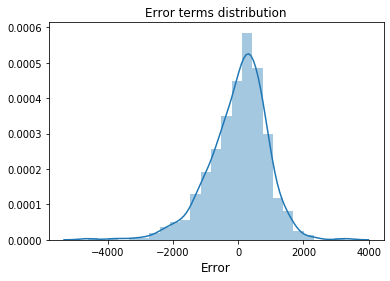

In [61]:
#Plot histogram of error terms

sns.distplot((y_train - y_train_pred),bins=25)
plt.title('Error terms distribution',fontsize=12)
plt.xlabel('Error',fontsize=12)
plt.show()

Error terms are normally distributed with mean at zero.

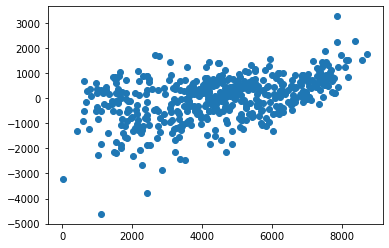

In [62]:
# Check whether error terms are independent
plt.scatter(y_train,(y_train - y_train_pred))
plt.show()

Error terms seems to be independent here. It doesn't have any obvious pattern

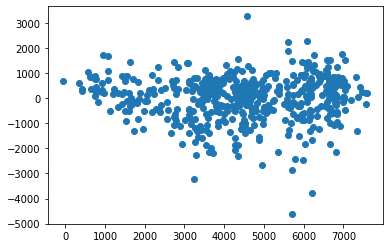

In [63]:
# Check whether error terms have constant variance
plt.scatter(y_train_pred,(y_train - y_train_pred))
plt.show()

Even though the error terms seems to have a constant variance, towards the higher values of predicted variable,
error seems to be increasing. As this is only for few data points, I will ignore this variance.

### Task 4: Make prediction on test data

In [64]:
# Rescale test data
X_test[contcols] = scaler.transform(X_test[contcols])

In [65]:
#Add constant variable
X_test_new = sm.add_constant(X_test)

In [66]:
# MOdify test with only selected columns
X_test_new = X_test_new[X_train_new4.columns]
X_test_new.head()

,const,yr,windspeed,season_spring,mnth_December,mnth_February,mnth_January,mnth_November,mnth_September,weathersit_clear,weathersit_light rain/snow
184,1.0,0,0.084219,0,0,0,0,0,0,0,0
535,1.0,1,0.153728,0,0,0,0,0,0,1,0
299,1.0,0,0.334206,0,0,0,0,0,0,0,0
221,1.0,0,0.339570,0,0,0,0,0,0,1,0
152,1.0,0,0.537414,0,0,0,0,0,0,1,0


In [67]:
# Do prediction for y_test
y_test_pred = lm.predict(X_test_new)

#### Model evaluation

In [68]:
# Get R - squared for test data
r2score=r2_score(y_test,y_test_pred)
r2score

0.775293352631319

In [69]:
# Calculate adjusted R- square for test data
adjr2 = 1-((1-r2score)*(X_test_new.shape[0] - 1)/(X_test_new.shape[0] - X_test_new.shape[1] - 1))
adjr2

0.7633524196793602

Model is performing well for the test data also. There is only 2.5% diffrence in adjusted R squared value of train and test data.

In [70]:
# Calculate RMSE
np.sqrt(mean_squared_error(y_test,y_test_pred))


897.9565414083953

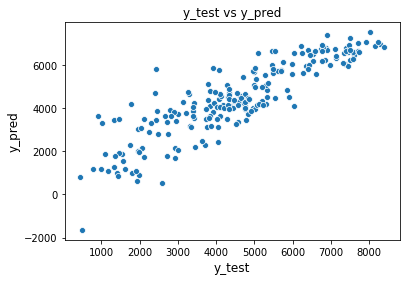

In [71]:
# Plot the spread of y_test and y_test_pred
sns.scatterplot(y_test,y_test_pred)
plt.title('y_test vs y_pred', fontsize=12)
plt.xlabel('y_test', fontsize=12)                          # X-label
plt.ylabel('y_pred', fontsize=12)                          # Y-label
plt.show()

#  Result of Analysis

In [72]:
print(lm.params.sort_values(ascending=False))

const                         4236.281080
yr                            2140.656301
weathersit_clear               765.705083
mnth_September                 619.708340
mnth_November                 -884.600447
mnth_February                 -889.781735
mnth_December                -1049.771395
mnth_January                 -1460.097374
season_spring                -1542.201289
windspeed                    -1819.452046
weathersit_light rain/snow   -1894.157790
dtype: float64


We can see that the equation of our best fitted line is:

cont = 4236.28 + 2140.65 * yr - 1819.45 * windspeed - 1542.2 * season_spring - 1049.77 * mnth_December - 889.78 * mnth_February - 1460.09 * mnth_January - 884.6 * mnth_November + 619.7 * mnth_September + 765.7 * weathersit_clear - 1894.15 * weathersit_light rain/snow 




Observations:
- As per the model below variables are most important in predicting the demand for bike sharing company, Boombikes.

 - 'yr'
 - 'weathersit_clear'
 - 'mnth_September'
 - 'mnth_November'
 - 'mnth_February'
 - 'mnth_December'
 - 'mnth_January'
 - 'season_spring'
 - 'windspeed'
 - 'weathersit_light rain/snow'

- Below given table has values corresponding to each prediactor variables, that quantifies each variable's relation with the demand. In other words below table shows how well the variables describe the bike demands.
 - yr                            2140.65
 - weathersit_clear               765.70
 - mnth_September                 619.70
 - mnth_November                 -884.60
 - mnth_February                 -889.78
 - mnth_December                -1049.77
 - mnth_January                 -1460.09
 - season_spring                -1542.20
 - windspeed                    -1819.45
 - weathersit_light rain/snow   -1894.15
 
- According to the model, year, clear weather condition and September month positively affect demand for bike sharing.
- Weather condition as light rain/snow, windspeed, spring season and Nov-Dec-Jan-Feb months negatively affects the demand.
 
 